In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('glass.csv')

In [4]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.shape

(214, 10)

In [8]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [18]:
df.duplicated().sum()
df.drop_duplicates(keep='first', inplace=True)


In [20]:
df.plot(kind='count')

ValueError: count is not a valid plot kind

RI         Axes(0.125,0.712609;0.133621x0.167391)
Na      Axes(0.285345,0.712609;0.133621x0.167391)
Mg       Axes(0.44569,0.712609;0.133621x0.167391)
Al      Axes(0.606034,0.712609;0.133621x0.167391)
Si      Axes(0.766379,0.712609;0.133621x0.167391)
K          Axes(0.125,0.511739;0.133621x0.167391)
Ca      Axes(0.285345,0.511739;0.133621x0.167391)
Ba       Axes(0.44569,0.511739;0.133621x0.167391)
Fe      Axes(0.606034,0.511739;0.133621x0.167391)
Type    Axes(0.766379,0.511739;0.133621x0.167391)
dtype: object

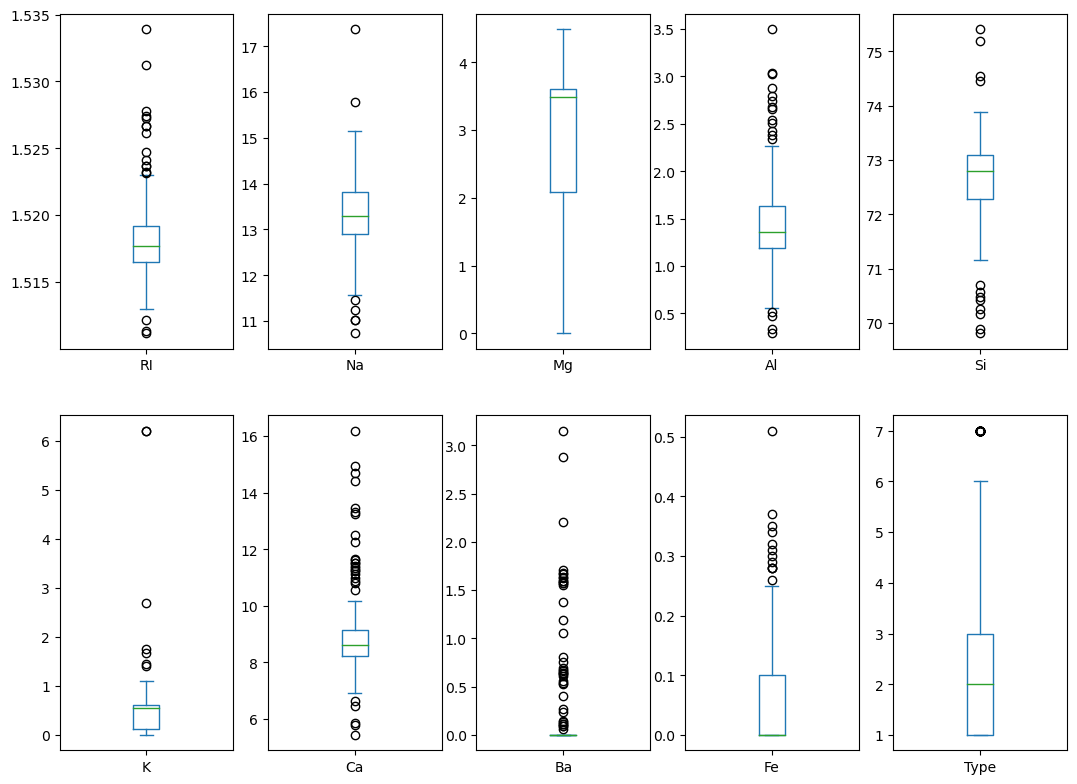

In [21]:
df.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)


<Axes: >

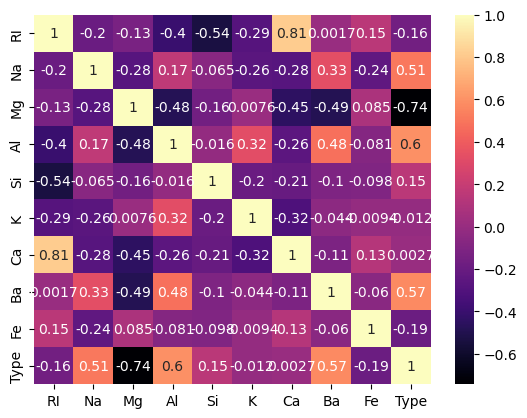

In [22]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='magma')

In [26]:
y=df['Type']
X = df.drop('Type',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def acc_score(X_train, y_train, X_test, y_test):
    k_values = list(range(1, 25))  
    accuracy_scores = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    return accuracy_scores


In [37]:
acc = acc_score(X_train, y_train, X_test, y_test)
result_df = pd.DataFrame(columns=['k', 'Accuracy'])

result_df['k'] = list(range(1, 25))
result_df['Accuracy'] = acc_score(X_train, y_train, X_test, y_test)

result_df = result_df.sort_values('Accuracy', ascending=False)


In [38]:
result_df

,k,Accuracy
0,1,0.765625
2,3,0.703125
1,2,0.671875
4,5,0.656250
3,4,0.640625
5,6,0.640625
14,15,0.625000
9,10,0.625000
22,23,0.609375
21,22,0.609375


In [49]:
from sklearn.model_selection import cross_val_score

# Create a list of k values to try
k_values = list(range(2, 26))

# Initialize an empty list to store cross-validation scores
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find the best k with the highest average cross-validation score
best_k = k_values[cv_scores.index(max(cv_scores))]


In [48]:
best_k

14